In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import gzip
with gzip.open('goodreads_books.json.gz', 'r') as f:
    line = f.readline()

In [60]:
import json
json.loads(line)

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

In [61]:
# Function to parse each line of the file
def parse(line):
    data = json.loads(line)
    return {
        "book_id": data.get("book_id"),
        "title": data.get("title"),
        "rating": data.get("ratings_count"),
        "url": data.get("url"),
        "image_url": data.get("image_url"),
        "average_rating": data.get("average_rating"),
    }

In [62]:
# Load the data
books = []
with gzip.open('goodreads_books.json.gz', 'r') as f:
    for line in f:
        books.append(parse(line))

In [63]:
titles = pd.DataFrame.from_records(books)
titles.head()

,book_id,title,rating,url,image_url,average_rating
0,5333265,W.C. Fields: A Life on Film,3,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,4.00
1,1333909,Good Harbor,10,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,3.23
2,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,4.03
3,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,3.49
4,287140,Runic Astrology: Starcraft and Timekeeping in ...,15,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,3.40


In [64]:
titles['rating'] = pd.to_numeric(titles['rating'])

In [65]:
titles['average_rating'] = pd.to_numeric(titles['average_rating'])

In [66]:
titles.head()

,book_id,title,rating,url,image_url,average_rating
0,5333265,W.C. Fields: A Life on Film,3.0,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,4.00
1,1333909,Good Harbor,10.0,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,3.23
2,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140.0,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,4.03
3,6066819,Best Friends Forever,51184.0,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,3.49
4,287140,Runic Astrology: Starcraft and Timekeeping in ...,15.0,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,3.40


In [67]:
titles['edit_title'] = titles['title'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

In [68]:
titles.head()

,book_id,title,rating,url,image_url,average_rating,edit_title
0,5333265,W.C. Fields: A Life on Film,3.0,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,4.00,WC Fields A Life on Film
1,1333909,Good Harbor,10.0,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,3.23,Good Harbor
2,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140.0,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,4.03,The Unschooled Wizard Sun Wolf and Starhawk 12
3,6066819,Best Friends Forever,51184.0,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,3.49,Best Friends Forever
4,287140,Runic Astrology: Starcraft and Timekeeping in ...,15.0,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,3.40,Runic Astrology Starcraft and Timekeeping in t...


In [69]:
# Lowercase the edit_title column
titles['edit_title'] = titles['edit_title'].str.lower()

In [70]:
# Remove extra spaces
titles['edit_title'] = titles['edit_title'].str.replace('\s+', ' ', regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Abdul\AppData\Local\Temp\ipykernel_12480\3952347300.py:2: SyntaxWarning: invalid escape sequence '\s'
  titles['edit_title'] = titles['edit_title'].str.replace('\s+', ' ', regex=True)


In [71]:
titles.head()

,book_id,title,rating,url,image_url,average_rating,edit_title
0,5333265,W.C. Fields: A Life on Film,3.0,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,4.00,wc fields a life on film
1,1333909,Good Harbor,10.0,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,3.23,good harbor
2,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140.0,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,4.03,the unschooled wizard sun wolf and starhawk 12
3,6066819,Best Friends Forever,51184.0,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,3.49,best friends forever
4,287140,Runic Astrology: Starcraft and Timekeeping in ...,15.0,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,3.40,runic astrology starcraft and timekeeping in t...


<Axes: >

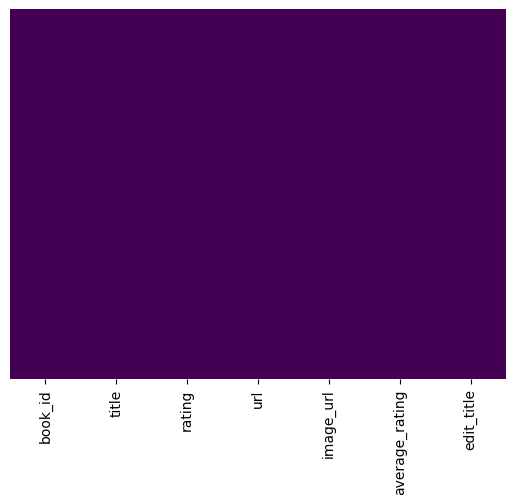

In [72]:
# check for missing values
sns.heatmap(titles.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [74]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360655 entries, 0 to 2360654
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   book_id         object 
 1   title           object 
 2   rating          float64
 3   url             object 
 4   image_url       object 
 5   average_rating  float64
 6   edit_title      object 
dtypes: float64(2), object(5)
memory usage: 126.1+ MB


In [75]:
titles.isnull().sum()

book_id             0
title               0
rating            524
url                 0
image_url           0
average_rating    524
edit_title          0
dtype: int64